<h2 style = "color: red" align = "center" >Logistic Regression: Customer Churn Prediction </h2>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Understandthedataset">Understand the dataset</a></li>
        <li><a href="https://#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="https://#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

<a id="ref1"></a>

## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass\_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

The objective of the **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ\_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

## Problem with Customer churn

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.


## Import Needed Packages

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="Understand the dataset">Understand the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


### Load the Telco Churn data



In [4]:
churn_df = pd.read_csv("E:\Python\ML_Learn\Logistic Regression\CustomerChurn\ChurnData.csv")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [5]:
churn_df.shape

(200, 28)

<h2 id="preprocessing">Data pre-processing and selection</h2>


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:

In [17]:
churn_df = churn_df[["tenure","age","address","income","ed","employ","equip","callcard","wireless","churn"]]
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1.0


In [18]:
churn_df.loc[0,'churn']= churn_df.loc[0,'churn'].astype("int")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1.0


<h2 >Define for the dataset</h2>


In [19]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [20]:
y = np.asanyarray(churn_df["churn"])
y

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Also, we normalize the dataset:


In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
print("Train set",X_train.shape,y_train.shape)
print("Test set",X_test.shape,y_test.shape)

Train set (160, 7) (160,)
Test set (40, 7) (40,)


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01,solver="liblinear").fit(X_train,y_train)

In [154]:
X_test

array([[ 0.53, -0.09,  0.43,  0.4 ,  0.92,  0.2 ,  1.16],
       [ 0.81, -0.63, -1.05, -0.12, -1.42, -0.47, -0.86],
       [-0.26, -1.01, -1.05, -0.43, -1.42, -0.25, -0.86],
       [ 0.76, -0.17, -0.56,  0.34,  0.14,  0.87, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-1.41,  0.45, -0.46, -0.23, -1.42, -0.47, -0.86],
       [-0.49, -0.93, -0.26, -0.16,  0.92, -1.03, -0.86],
       [ 0.35, -0.93, -0.75, -0.33, -1.42,  0.31, -0.86],
       [-1.41, -0.7 , -0.56, -0.33,  0.92, -0.81,  1.16],
       [ 1.04, -0.4 ,  0.13, -0.28, -0.64, -0.25, -0.86],
       [ 1.13,  0.29,  1.12,  0.33,  0.92,  0.09,  1.16],
       [ 1.18,  0.68,  0.43,  0.9 , -0.64,  1.32,  1.16],
       [-1.37, -1.62, -1.15, -0.39, -0.64, -1.14, -0.86],
       [-1.09, -0.78, -0.36, -0.45,  0.92, -0.7 ,  1.16],
       [-0.44,  1.06,  0.13, -0.11, -1.42,  1.77, -0.86],
       [-0.49, -0.24,  0.73, -0.15, -1.42,  0.98,  1.16],
       [-0.12,  0.98,  0.63, -0.14,  0.92, -0.7 ,  1.16],
       [ 1.09,

In [155]:
y_hat = LR.predict(X_test)
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

In [156]:
y_test

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0.])

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [157]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

In [170]:
#Get the proba_score of class 1
y_prob = [0]* y_hat_prob.shape[0]
for i in range (y_hat_prob.shape[0]):
    y_prob[i] = y_hat_prob[i][1]
print(y_prob)

[0.45867080741270017, 0.39406643339140657, 0.4372228680850894, 0.3656751106338226, 0.43568161018235346, 0.4461335430850323, 0.47762792694809053, 0.39485651433809094, 0.5893042791611749, 0.36661269720119627, 0.4193120883782118, 0.3723137162132313, 0.5244011748339708, 0.5732406996342294, 0.3382758279076838, 0.4490768456471964, 0.48250053738018156, 0.5142569956463106, 0.5098854873467517, 0.47576651113288787, 0.3838048132734805, 0.47303698302228003, 0.360428316116679, 0.4779483591733049, 0.4942714849332277, 0.292937978831393, 0.44733713587660423, 0.47728405957999215, 0.4836113724832678, 0.286686094234969, 0.3213788850475895, 0.4910359708568173, 0.5765191777450169, 0.2850416161403532, 0.40288935588997776, 0.36191161271293154, 0.6004210464882082, 0.47872362179301164, 0.34024536430433483, 0.48858279928082815]


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

<h2 id="evaluation">Evaluation</h2>


In [171]:
cf_mt = confusion_matrix(y_test,y_hat,labels=[1,0])
cf_mt

array([[ 6,  9],
       [ 1, 24]], dtype=int64)

In [172]:
import itertools
def plot_confusion_matrix(cm, classes,normalize = False,title = "Confusion Matrix",cmap = plt.cm.Reds):
    if normalize == True:
        cm = cm.astype('float').cm.sum(axis = 1)[:np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(cm)
    #Plot confusion matrix
    plt.imshow(cm,interpolation = "nearest",cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark = np.arange(len(classes))
    plt.xticks(tick_mark, classes)
    plt.yticks(tick_mark,classes)
    threshold = cm.max()/2
    fmt = '%2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment = 'center',
                 color = 'white' if cm[i,j] >threshold else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix Without Normalization
[[ 6  9]
 [ 1 24]]


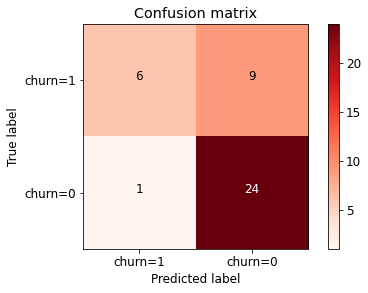

In [173]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [174]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss

Now, let's try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


In [175]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat_prob)

0.6017092478101187

### Plot ROC curve

In [177]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
tpr, fpr, thresholds = roc_curve(y_test,y_prob)
print(tpr)
print(fpr)

[0.   0.   0.   0.04 0.04 0.2  0.2  0.24 0.24 0.28 0.28 0.44 0.44 0.48
 0.48 0.64 0.64 1.  ]
[0.   0.07 0.27 0.27 0.4  0.4  0.53 0.53 0.6  0.6  0.67 0.67 0.87 0.87
 0.93 0.93 1.   1.  ]


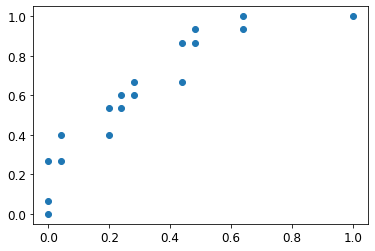

In [178]:
plt.scatter(tpr,fpr)

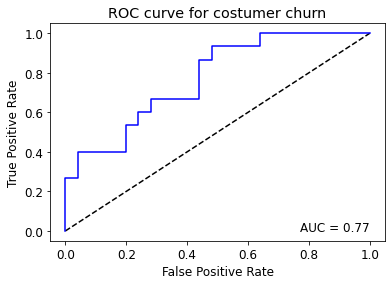

<Figure size 720x576 with 0 Axes>

In [183]:
ROC_AUC = roc_auc_score(y_test,y_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,color = 'blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for costumer churn")
plt.rcParams['font.size']= 12
plt.text(1,0,'AUC = {}'.format(round(ROC_AUC,2)),horizontalalignment = 'right')
plt.figure(figsize=(10,8))
plt.show()

In [184]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_prob)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7707


In [185]:
from sklearn.metrics import f1_score

score = f1_score(y_test, y_hat)

print('F1 Score = {}'.format(score))

F1 Score = 0.5454545454545455
